# <font color= blue> __Giving the Right People the Right Aid__
> ## Poverty Classification in Costa Rica Using Machine Learning


"Many social programs have a hard time making sure the right people are given enough aid." Proving one's qualification for government aid is difficult for those who most need that aid; providing the necessary records for such aid is nearly impossible for them. Latin American countries use what is called the Proxy Means Test (PMT) to help classify these people based on their observable characteristics, to help as many as possible get the aid appropriate for their income level and family size. It is believed that there is more that can be done, beyond normal econometrics, to improve the PMT. <br>
This is where machine learning comes in.

## <font color=blue> Table of Contents
> ### 1- Data Overview
> > 1.1 Understanding the Problem <br>
> > 1.2 Import Useful Tools <br>
> > 1.3 Read-In the Data <br>
> > 1.4 A First Look at the Dataset <br>
> > 
> ### 2- Cleaning Our Data
> > 2.1 Checking Feature Information <br>
> > 2.2 Finding and Fixing Missing Values <br>
> > 2.3 A Second Look at the Dataset
> ### 3- Beginning the Modelling


## Data Overview
> ### 1.1 Understanding the Problem
We are tasked with predicting household income levels into 4 classes: 1 being the most desperate poverty, 2 slightly higher income, 3 even higher, and 4 the highest income level for those in our dataset. The observations within our data are given on an individual level, but the task is to predict _household_ income level, not individual. Thankfully, each observation contains a household ID, so we can group our observations in this way. Unfortunately, there are likely to be discrepancies in the feature values across individuals within the same household. This may cause issues with our target prediction, so we will need to fix these as well. 

> ### 1.2 Import Useful Tools
We import here several useful tools such as numpy for linear algebra, pandas for general data manipulation, and matplotlib and seaborn for data visualization. 

In [730]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set a few plotting defaults
%matplotlib inline

> ### 1.3 Read-In the Data
Let's take a look at the data we ahve to work with.

In [731]:
pd.options.display.max_columns = 150

# Read in data
train = pd.read_csv('/Users/neil/Desktop/train.csv')
test = pd.read_csv('/Users/neil/Desktop/test.csv')
train.head()

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target
0,ID_279628684,190000.0,0,3,0,1,1,0,NaN,0,1,1,0,0,0,0,1,1,1,1,10,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,21eb7fcc1,0,1,0,1,no,10,no,10.0,0,0,0,1,0,0,0,0,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,43,100,1849,1,100,0,1.000000,0.0,100.0,1849,4
1,ID_f29eb3ddd,135000.0,0,4,0,1,1,1,1.0,0,1,1,0,0,0,0,1,1,1,1,12,NaN,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0e5d7a658,0,1,1,1,8,12,no,12.0,0,0,0,0,0,0,0,1,0,1,1.000000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,67,144,4489,1,144,0,1.000000,64.0,144.0,4489,4
2,ID_68de51c94,NaN,0,8,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,2c7317ea8,0,1,1,1,8,no,11,11.0,0,0,0,0,1,0,0,0,0,2,0.500000,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,92,121,8464,1,0,0,0.250000,64.0,121.0,8464,4
3,ID_d671db89c,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,9,1.0,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,1,0,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,17,81,289,16,121,4,1.777778,1.0,121.0,289,4
4,ID_d56d6f5f5,180000.0,0,5,0,1,1,1,1.0,0,2,2,1,1,2,1,3,4,4,4,11,NaN,4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2b58d945f,2,2,0,4,yes,11,no,11.0,0,0,0,0,1,0,0,0,0,3,1.333333,0,0,1,0,0,0,0,1,3,1,0,0,0,0,0,1,0,37,121,1369,16,121,4,1.777778,1.0,121.0,1369,4


In [732]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 143 entries, Id to Target
dtypes: float64(8), int64(130), object(5)
memory usage: 10.4+ MB


In [733]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Columns: 142 entries, Id to agesq
dtypes: float64(8), int64(129), object(5)
memory usage: 25.8+ MB


> ### 1.4 A First Look at the Dataset
Given our data head and the information above, we have 9557 observations in our training data, with 143 features to work with. One of these features in our target, the poverty classification. Our testing dataset has 23856 observations, giving us a roughly 1:2 ratio for training versus testing data. Note that our test data do _not_ have a target variable. 
In looking at the first few rows, we can already tell we have some work to do. There are several 'NaN', or missing values. A few of our variables seem to give numerical information, such as 'rooms', while many others give categorical information with binary variables: 'pareddes', 'paredmad', 'public', etc. 
We have many numerical variables, and only 5 object-type variables. Let's take a look at these.


## Cleaning Our Data
> ### 2.1 Checking Feature Information
Here, we append the test set to the training set so we can apply all of our changes to both sets. 

In [734]:
test['Target'] = np.nan
data = train.append(test, ignore_index = True)
data.columns[data.dtypes==object]

Index(['Id', 'idhogar', 'dependency', 'edjefe', 'edjefa'], dtype='object')

These are our five object type variables. One that sticks out on first glance is 'dependency', which is supposed to signify the dependency rate, meaning how many people in the household are younger than 19 or older than 64 divided by the number of people in the household who are between 19 and 64. This should be a float, not a string. Let's take a closer look at unique values in 'dependency':

In [735]:
data['dependency'].unique()

array(['no', '8', 'yes', '3', '.5', '.25', '2', '.66666669', '.33333334',
       '1.5', '.40000001', '.75', '1.25', '.2', '2.5', '1.2', '4',
       '1.3333334', '2.25', '.22222222', '5', '.83333331', '.80000001',
       '6', '3.5', '1.6666666', '.2857143', '1.75', '.71428573',
       '.16666667', '.60000002', '.375', '.14285715', '.85714287', '.125',
       '2.3333333', '7', '3.3333333'], dtype=object)

We have 'yes' and 'no' as values in this would-be numericla feature. Let's see if these values correspond to the values in the related SQBdependency, which is the square of the dependency rate.

In [736]:
data[(data['dependency']=='no') & (data['SQBdependency']!=0)]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


In [737]:
data[(data['dependency']=='yes') & (data['SQBdependency']!=1)]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target


It seems that we've found the problem. 'no' in 'dependency' actually means a dependency rate of zero, since there are no values of 'SQBdependency' that are _not_ '0' when 'dependency' is 'no'. Similarly, there are no values of 'SQBdependency' that are _not_ '1' when 'dependency' is 'no'. Since 'dependency' should be the square root of 'SQBdependency', we can replace all 'no' values with '0', and all 'yes' values with '1'. Or, to make sure all values of 'dependency are correct', we will replace the column with the square root of 'SQBdependency'.

In [738]:
data['dependency']=np.sqrt(data['SQBdependency'])

Now we'll look are education values for males in the household ('edjefe'), and females in the household ('edjefa'). 

In [739]:
data['edjefe'].unique()

array(['10', '12', 'no', '11', '9', '15', '4', '6', '8', '17', '7', '16',
       '14', '5', '21', '2', '19', 'yes', '3', '18', '13', '20'],
      dtype=object)

In [740]:
data['edjefa'].unique()

array(['no', '11', '4', '10', '9', '15', '7', '14', '13', '8', '17', '6',
       '5', '3', '16', '19', 'yes', '21', '12', '2', '20', '18'],
      dtype=object)

It seems we have a similar issue with these would-be integers features. Fortunately, we again have the square of these features in other columns. 

In [741]:
data[['edjefe', 'edjefa', 'SQBedjefe']][:20]

,edjefe,edjefa,SQBedjefe
0,10,no,100
1,12,no,144
2,no,11,0
3,11,no,121
4,11,no,121
5,11,no,121
6,11,no,121
7,9,no,81
8,9,no,81
9,9,no,81


In [742]:
data[(data['edjefe']=='no') & (data['edjefa']=='no')][['edjefe', 'edjefa', 'age', 'escolari', 'female', 'male', 'Id', 'parentesco1', 'idhogar']]

,edjefe,edjefa,age,escolari,female,male,Id,parentesco1,idhogar
86,no,no,89,0,1,0,ID_48c10ba80,1,2b1a06ddc
87,no,no,55,13,0,1,ID_1a283d51b,0,2b1a06ddc
121,no,no,21,14,1,0,ID_fdf18bbee,0,d9e9b591a
122,no,no,47,8,0,1,ID_cba836ed8,0,d9e9b591a
123,no,no,49,9,1,0,ID_6031cb88d,0,d9e9b591a
124,no,no,68,0,1,0,ID_0bc817cb2,1,d9e9b591a
125,no,no,21,14,1,0,ID_1cfb76926,0,d9e9b591a
166,no,no,6,0,1,0,ID_f435c5e46,0,71bec40bc
167,no,no,9,1,0,1,ID_a51262dae,0,71bec40bc
168,no,no,26,5,1,0,ID_7e6d23b28,0,71bec40bc


Looking carefully at this chart tells us a few things: 
1. edjefe' and 'edjefa' are both 'no' when the head of the household had 0 years of school
2. In some cases, 'edjefe'= 'yes' and 'edjefa'='no', or 'edjefe'= 'no' and 'edjefa'='yes', but in all of these cases the head of the household had 1 year of schooling
3. For the majority of cases, 'edjefe' or 'edjefa' has a number while the other has 'no'

Since these features correlate so closely, we can merge them into one variable to safely use them in our modelling. Education has historically been the one of the best methods for increasing income, so it is important that our education feature is as clean as possible.

In [743]:
#Merge
conditions = [
    (data['edjefe']=='no') & (data['edjefa']=='no'), #both no
    (data['edjefe']=='yes') & (data['edjefa']=='no'), # yes and no
    (data['edjefe']=='no') & (data['edjefa']=='yes'), #no and yes 
    (data['edjefe']!='no') & (data['edjefe']!='yes') & (data['edjefa']=='no'), # number and no
    (data['edjefe']=='no') & (data['edjefa']!='no') # no and number
]
choices = [0, 1, 1, data['edjefe'], data['edjefa']]
data['edjefx']=np.select(conditions, choices)
data['edjefx']=data['edjefx'].astype(int)
data[['edjefe', 'edjefa', 'edjefx']][:15]

,edjefe,edjefa,edjefx
0,10,no,10
1,12,no,12
2,no,11,11
3,11,no,11
4,11,no,11
5,11,no,11
6,11,no,11
7,9,no,9
8,9,no,9
9,9,no,9


> ### 2.2 Finding and Fixing Missing Values
We want as many of our features to be as useable as possible, and for that to happen, we have to find and fill in as many missing values as we can. This is where we do that. 

In [744]:
data.columns[data.isna().sum()!=0]

Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'SQBmeaned', 'Target'], dtype='object')

We have 5 features with missing values, not counting 'Target' in our test set. Let's take a look at each one. 
-  'v2a1' - monthly rent paid by the household
-  'v18q1' - number of tablets in the household
-  'rez_esc' - years behind in school per individual
-  'meaneduc' - mean education for adults in the household
-  'SQBmeaned' - square of 'meaneduc'

In [745]:
data[data['meaneduc'].isnull()]

,Id,v2a1,hacdor,rooms,hacapo,v14a,refrig,v18q,v18q1,r4h1,r4h2,r4h3,r4m1,r4m2,r4m3,r4t1,r4t2,r4t3,tamhog,tamviv,escolari,rez_esc,hhsize,paredblolad,paredzocalo,paredpreb,pareddes,paredmad,paredzinc,paredfibras,paredother,pisomoscer,pisocemento,pisoother,pisonatur,pisonotiene,pisomadera,techozinc,techoentrepiso,techocane,techootro,cielorazo,abastaguadentro,abastaguafuera,abastaguano,public,planpri,noelec,coopele,sanitario1,sanitario2,sanitario3,sanitario5,sanitario6,energcocinar1,energcocinar2,energcocinar3,energcocinar4,elimbasu1,elimbasu2,elimbasu3,elimbasu4,elimbasu5,elimbasu6,epared1,epared2,epared3,etecho1,etecho2,etecho3,eviv1,eviv2,eviv3,dis,male,female,estadocivil1,estadocivil2,estadocivil3,estadocivil4,estadocivil5,estadocivil6,estadocivil7,parentesco1,parentesco2,parentesco3,parentesco4,parentesco5,parentesco6,parentesco7,parentesco8,parentesco9,parentesco10,parentesco11,parentesco12,idhogar,hogar_nin,hogar_adul,hogar_mayor,hogar_total,dependency,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,bedrooms,overcrowding,tipovivi1,tipovivi2,tipovivi3,tipovivi4,tipovivi5,computer,television,mobilephone,qmobilephone,lugar1,lugar2,lugar3,lugar4,lugar5,lugar6,area1,area2,age,SQBescolari,SQBage,SQBhogar_total,SQBedjefe,SQBhogar_nin,SQBovercrowding,SQBdependency,SQBmeaned,agesq,Target,edjefx
1291,ID_bd8e11b0f,NaN,0,7,0,1,1,0,NaN,0,0,0,0,1,1,0,1,1,1,1,10,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1b31fd159,1,0,0,1,8.0,no,10,NaN,0,0,0,1,0,0,0,0,0,5,0.200000,1,0,0,0,0,1,1,1,1,1,0,0,0,0,0,1,0,18,100,324,1,0,1,0.040000,64.0,NaN,324,4.0,10
1840,ID_46ff87316,110000.0,0,1,0,1,1,0,NaN,0,1,1,0,1,1,0,2,2,2,2,6,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4,no,NaN,0,0,1,0,0,0,0,0,0,1,2.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,36,324,4,16,4,4.000000,64.0,NaN,324,4.0,4
1841,ID_69f50bf3e,110000.0,0,1,0,1,1,0,NaN,0,1,1,0,1,1,0,2,2,2,2,4,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,a874b7ce7,2,0,0,2,8.0,4,no,NaN,0,1,0,0,0,0,0,0,0,1,2.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,18,16,324,4,16,4,4.000000,64.0,NaN,324,4.0,4
2049,ID_db3168f9f,180000.0,0,3,0,1,1,0,NaN,0,2,2,0,0,0,0,2,2,2,2,12,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,faaebf71a,2,0,0,2,8.0,12,no,NaN,0,0,0,0,0,0,1,0,0,2,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.000000,64.0,NaN,361,4.0,12
2050,ID_2a7615902,180000.0,0,3,0,1,1,0,NaN,0,2,2,0,0,0,0,2,2,2,2,12,NaN,2,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,faaebf71a,2,0,0,2,8.0,12,no,NaN,0,0,0,0,0,0,1,0,0,2,1.000000,0,0,1,0,0,0,0,1,2,1,0,0,0,0,0,1,0,19,144,361,4,144,4,1.000000,64.0,NaN,361,4.0,12
9561,ID_a62966799,175000.0,0,4,0,1,1,1,1.0,0,0,0,0,1,1,0,1,1,1,1,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1e2fc704e,1,0,0,1,8.0,no,11,NaN,0,0,0,0,1,0,0,0,0,2,0.500000,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,1,0,18,121,324,1,0,1,0.250000,64.0,NaN,324,NaN,11
10092,ID_ab0fe3b38,399378.0,0,6,0,1,0,1,3.0,0,0,0,0,1,1,0,1,1,1,4,11,NaN,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,bb7038e41,1,0,0,1,8.0,no,11,NaN,0,0,0,0,1,0,0,0,0,4,1.000000,0,0,1,0,0,0,1,1,4,1,0,0,0,0,0,1,0,18,121,324,1,0,1,1.000000,64.0,NaN,324,NaN,11
10093,ID_4f297efe7,180000.0,0,4,0,1,1,0,NaN,0,0,0,0,2,2,0,2,2,2,2,12,NaN,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0

In [746]:
data[data['meaneduc'].isnull()][['Id','idhogar','edjefe','edjefa', 'hogar_adul', 'hogar_mayor', 'hogar_nin', 'age', 'escolari']]

,Id,idhogar,edjefe,edjefa,hogar_adul,hogar_mayor,hogar_nin,age,escolari
1291,ID_bd8e11b0f,1b31fd159,no,10,0,0,1,18,10
1840,ID_46ff87316,a874b7ce7,4,no,0,0,2,18,6
1841,ID_69f50bf3e,a874b7ce7,4,no,0,0,2,18,4
2049,ID_db3168f9f,faaebf71a,12,no,0,0,2,19,12
2050,ID_2a7615902,faaebf71a,12,no,0,0,2,19,12
9561,ID_a62966799,1e2fc704e,no,11,0,0,1,18,11
10092,ID_ab0fe3b38,bb7038e41,no,11,0,0,1,18,11
10093,ID_4f297efe7,4937daf94,no,12,0,0,2,19,12
10094,ID_b41dee3bb,4937daf94,no,12,0,0,2,19,12
12169,ID_ad3389376,4deb0c65e,8,no,0,0,2,19,8


Only 5 rows in the dataset have a missing value for 'meaneduc', and these observations are households in whcih only 18 to 19 year-olds live. We can simply replace 'meaneduc' and 'SQBmeaned' using 'escolari', which is the amount of education for the individual child. 

In [747]:
#Replacing education variables with missing values with 'edusolari'
meaneduc_missing = data[data['meaneduc'].isnull()][['Id','idhogar','escolari']]
meaneducation = meaneduc_missing.groupby('idhogar')['escolari'].mean().reset_index()

for row in meaneduc_missing.iterrows():
    i = row[0]
    idhogar = row[1]['idhogar']
    m = meaneducation[meaneducation['idhogar']==idhogar]['escolari'].tolist()[0]
    data.at[i, 'meaneduc'] = m
    data.at[i, 'SQBmeaned'] = m*m

Moving on to the other variables with missing values:

In [748]:
data['v2a1'].isna().sum()

24263

That's a lot of missing values. 

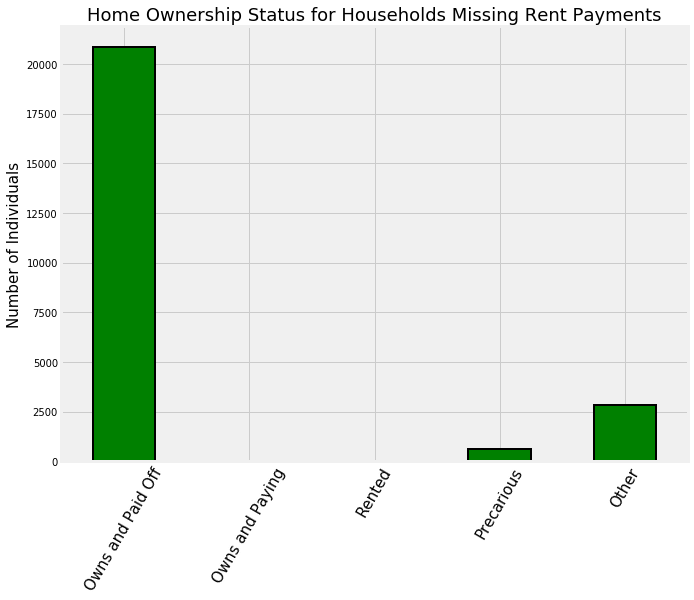

In [749]:
# Variables indicating home ownership
own_variables = [x for x in data if x.startswith('tipo')]


# Plot of the home ownership variables for home missing rent payments
data.loc[data['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
                                                                        color = 'green',
                                                              edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
           ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
          rotation = 60, fontsize = 15)
plt.ylabel('Number of Individuals', fontsize = 15)
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

The above graph shows us that the vast majority of the missing values for rent payments come from people who own their owns houses. Obviously, these people aren ot paying rent. 

In [750]:
norent = data[data['v2a1'].isnull()]
print("House is owned:", norent[norent['tipovivi1'] == 1]['Id'].count())
print("House is rented", norent[norent['tipovivi3'] == 1]['Id'].count())

House is owned: 20844
House is rented 0


Despite the enoromity of missing values, it appears that many, if not all of them, own their house, or are in some other circumstaance. Regardless, none of the houses are rented, which means these individuals are not paying rent. We can replace the rent payment variable with '0' in all of these cases. 

In [751]:
# Replace rent amount for indivudals with non-rented houses with '0'
data['v2a1'] = data['v2a1'].fillna(0)

Now we take a look at the missing values of the number of tablets in the household. 

In [752]:
data['v18q1'].isna().sum()

25468

Again, that's a LOT of missing values. Maybe there's more going on. The feature 'v18q1' signifies whether there is a tablet in the house, so perhaps we can use that. 

In [753]:
tabletnan = data[data['v18q1'].isnull()]
tabletnan[tabletnan['v18q'] == 0]['Id'].count()

25468

It's the exact same number. So, all of the 'Nan's in 'v2a1' simply mean that the household has zero tablets. We can safely replace all missing values with '0'. 

In [754]:
data['v18q1'] = data['v18q1'].fillna(0)

Now we'll finish our missing value witch-hunt with 'rez_esc', which indicates how behind an individual is in school. We could speculate that the missing values here are likely those that are not _in_ school. We'll test that theory. 

In [755]:
data['rez_esc'].isnull().sum()

27581

Again; many missing values. Let's see how old the people are that don't have missing values. 

In [756]:
data[data['rez_esc']>1][['age', 'escolari', 'rez_esc']][:20]

,age,escolari,rez_esc
185,13,3,3.0
190,16,7,2.0
240,16,6,3.0
242,11,2,2.0
312,15,6,2.0
317,17,6,4.0
319,17,7,3.0
320,15,6,2.0
333,16,7,2.0
510,16,7,2.0


In [757]:
rez_esc_nan = data[data['rez_esc'].isnull()]
rez_esc_nan[(rez_esc_nan['age'] < 18) & rez_esc_nan['escolari'] > 0][['age', 'escolari']]

,age,escolari


There are no school-age individuals who have missing values for 'rez_esc'. This must mean that only adults or children before school age have the missing values. Since these individuals are not in school, we can replace their missing values with '0'. 

In [758]:
data['rez_esc'] = data['rez_esc'].fillna(0)

There are some households who have multiple values for 'target', which will be an issue with our predictions. So, we will correct this by setting all values of 'target' within a household equal to the value of target for the head of the household. 

In [759]:
#Split our dataset into training and testing again
train_set = data[data['Target'].notnull()]
test_set = data[data['Target'].isnull()]



#Perform the correction on 'Target' per household
d={}
weird=[]
for row in train_set.iterrows():
    idhogar = row[1]['idhogar']
    target=row[1]['Target']
    if idhogar in d:
        if d[idhogar]!=target:
            weird.append(idhogar)
    else:
        d[idhogar]=target
        
for i in set(weird):
    hhold = train_set[train_set['idhogar'] == i][['idhogar', 'parentesco1', 'Target']]
    target = hhold[hhold['parentesco1'] == 1]['Target'].tolist()[0]
    for row in hhold.iterrows():
        idx = row[0]
        if row[1]['parentesco1']!=1:
            train_set.at[idx, 'Target']=target
    

> ### 2.3 A Second Look at the Dataset
In this section, we will use several plots to understand more about our dataset now that it is cleaned. 

Text(0.5,1,'Individual Poverty Level Frequency')

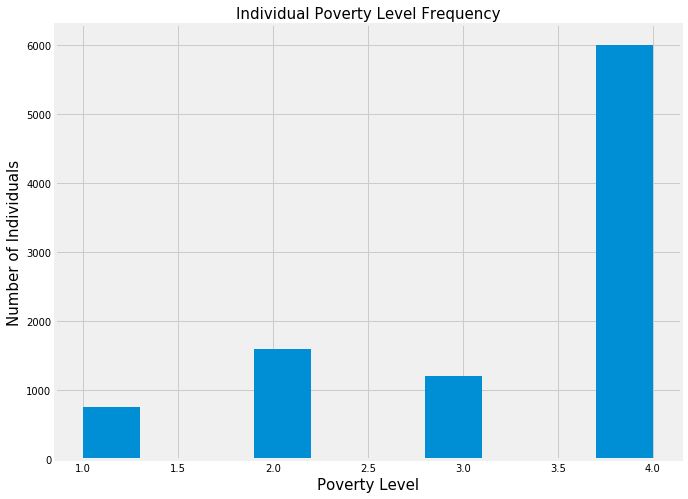

In [760]:
f, ax = plt.subplots(figsize=(10, 8))
train['Target'].hist()
plt.xlabel('Poverty Level', fontsize=15)
plt.ylabel('Number of Individuals', fontsize=15)
plt.title('Individual Poverty Level Frequency', fontsize=15)



The graph above shows us how many individuals in our training data are in each poverty level. It seems that the worst poverty level, '1', has the fewest, which probably makes us feel good. There is an overwhelming amount in the '4' poverty level compared to the others. Since there are so few in the lower poveryt levels, our models may have a difficult time classifying them accurately because it will see fewer examples of the lower levels than the upper level. 

In [761]:
#Split our dataset into training and testing again
train_set = data[data['Target'].notnull()]
test_set = data[data['Target'].isnull()]


The below graph shows us the correlation between certain variables we may consider important and the target variable, and between the variables themselves. It appears that the ones we've chosen don't correlate closely with eachother, but some do have some significant correlation with 'Target'. This means that, for at least these features, we don't need to worry about collinearity. 

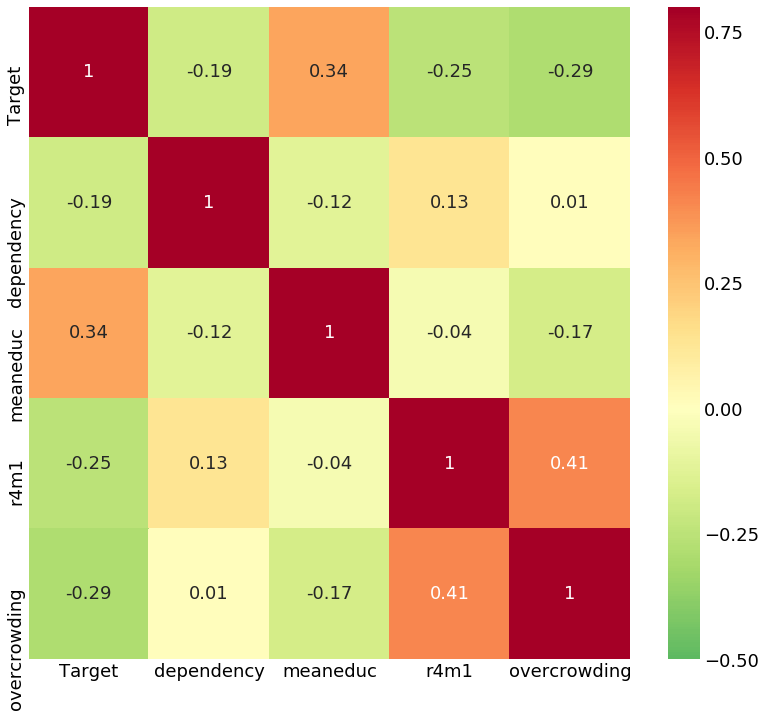

In [762]:
variables = ['Target', 'dependency', 'meaneduc', 'r4m1', 'overcrowding']

# Calculate the correlations
corr_mat = train_set[variables].corr().round(2)

# Draw a correlation heatmap
plt.rcParams['font.size'] = 18
plt.figure(figsize = (12, 12))
sns.heatmap(corr_mat, vmin = -0.5, vmax = 0.8, center = 0, 
            cmap = plt.cm.RdYlGn_r, annot = True);

## Beginning the Modelling

Here in the modelling section we import a few models and various tools to try and improve our predictions.

In [763]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import cross_val_score

# Model imports
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.neighbors import KNeighborsClassifier


from sklearn.preprocessing import Imputer
# F1 score imports
from sklearn.metrics import f1_score

scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

In [764]:
import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
warnings.filterwarnings('ignore', category = UserWarning)


We split our training data into sub training and testing sections, to see how well our model predicts the target. 

In [765]:
train_set = train_set.replace('no', 0)
train_set = train_set.replace('yes', 1)
X = train_set[train_set['Target'].notnull()].drop(columns = ['Id', 'idhogar', 'Target']) 
y = train_set['Target']

In [766]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [767]:
X_train.shape

(7645, 141)

In [768]:
y_train.shape

(7645,)

In [769]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

The first model we implement is a RandomForestClassifier model, which is known for making some of the bets predictions from among the various machine learning models. While it is generally an excellent model for classification, it does have a danger of overfitting. 

In [770]:
clf = RandomForestClassifier()
svc = LinearSVC()
lr = LogisticRegressionCV()

params={'n_estimators': list(range(40,61, 1))}
gsclf = GridSearchCV(clf, params, cv=5)

In [771]:
gsclf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [772]:
preds1=gsclf.predict(X_test)

In [773]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

        1.0       0.07      0.06      0.06       144
        2.0       0.16      0.15      0.16       329
        3.0       0.16      0.12      0.14       250
        4.0       0.63      0.68      0.65      1189

avg / total       0.44      0.47      0.46      1912



As predicted, our precision and recall generally improve as more observation support is included. We're very bad at predicting lower poverty classes, and much better, though not perfect, at predicting the highest poverty class.
There isn't much confidence in our predicitons here; we would be able to predict better if the dataset were more balanced. As a consequence, it is unlikely that our prediction will get much better simply by adding the same data.

In [774]:
cvres = gs.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(mean_score), params)

0.9458871073665588 {'n_estimators': 40}
0.9460945160100706 {'n_estimators': 41}
0.9456104917421714 {'n_estimators': 42}
0.9464400960763896 {'n_estimators': 43}
0.9461636421210027 {'n_estimators': 44}
0.9463018791941519 {'n_estimators': 45}
0.9462327631819943 {'n_estimators': 46}
0.9465782927765606 {'n_estimators': 47}
0.9455413251918289 {'n_estimators': 48}
0.9476141256155146 {'n_estimators': 49}
0.9453337951768498 {'n_estimators': 50}
0.9478901565347438 {'n_estimators': 51}
0.9470618224209265 {'n_estimators': 52}
0.945402976910279 {'n_estimators': 53}
0.9478901565347438 {'n_estimators': 54}
0.9476831408827571 {'n_estimators': 55}
0.9473380142676907 {'n_estimators': 56}
0.9475451053214855 {'n_estimators': 57}
0.947959151705817 {'n_estimators': 58}
0.9468546256660485 {'n_estimators': 59}
0.9465782927765606 {'n_estimators': 60}


Given our training prediction, we'll fit our model on the test data and submit our predicitons.

In [775]:
ids=test_set['Id']
test_set = test_set.replace('no', 0)
test_set = test_set.replace('yes', 1)
test_set = test_set.drop(columns = ['Id', 'idhogar', 'Target'])
test_predictions=gsclf.predict(test_set)

In [776]:
submit = pd.DataFrame({'Id': ids, 'Target': test_predictions})

In [777]:
submit.to_csv('submit.csv', index=False)